In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from pandas import DataFrame
import scipy.stats as st
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

**Inserting Data**

In [2]:
house = pd.read_csv('/content/Dataset.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Missing Data and data types**

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Data types**

In [5]:
house.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

**Missing data**

In [6]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Data type and number of unique values

In [7]:
house_info = pd.DataFrame(house.dtypes, columns=['Dtype'])
house_info['Unique'] = house.nunique().values
house_info['Null'] = house.isnull().sum().values
house_info

,Dtype,Unique,Null
Id,int64,1460,0
MSSubClass,int64,15,0
MSZoning,object,5,0
LotFrontage,float64,110,259
LotArea,int64,1073,0
...,...,...,...
MoSold,int64,12,0
YrSold,int64,5,0
SaleType,object,9,0
SaleCondition,object,6,0


**Attributes with missing data**

In [8]:
null_att = []
n= 0
null_num = 0 
for row in house_info.index:
  
  if house_info.iat[n,2] > 0:
    n +=1
    null_att.append(row)
    null_num += 1
  else:
    n = n+1


In [9]:
null_att

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
null_num

19

**NA Data**

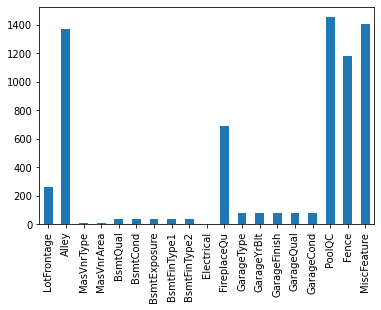

In [11]:
House_null = house.isnull().sum()
House_null = House_null[House_null > 0]
House_null.plot.bar()

**House price statistics**

In [12]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**House price distribution**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


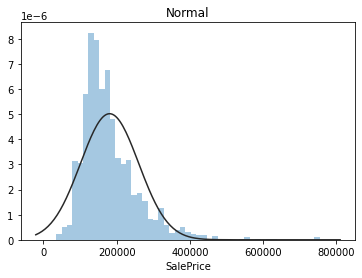

In [13]:
house_price = house['SalePrice']
plt.figure; plt.title('Normal')
sns.distplot(house_price, kde=False, fit=st.norm)

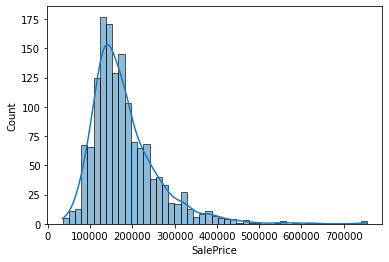

In [14]:
sns.histplot(data=house, x="SalePrice", fill=True, kde=True)

**statistic paramiters for house dataset**

In [15]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**correlation for the dataset**

In [16]:
cor_data = house.drop('Id' , axis= 1)
cor_df = cor_data.corr()
cor_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [17]:
cor_df.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


**high correlation attributes with house price.**

In [18]:
cor_sort = cor_df.sort_values(by=['SalePrice'])
cor_sort['SalePrice']


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

**Histogram for numerical attributes.**

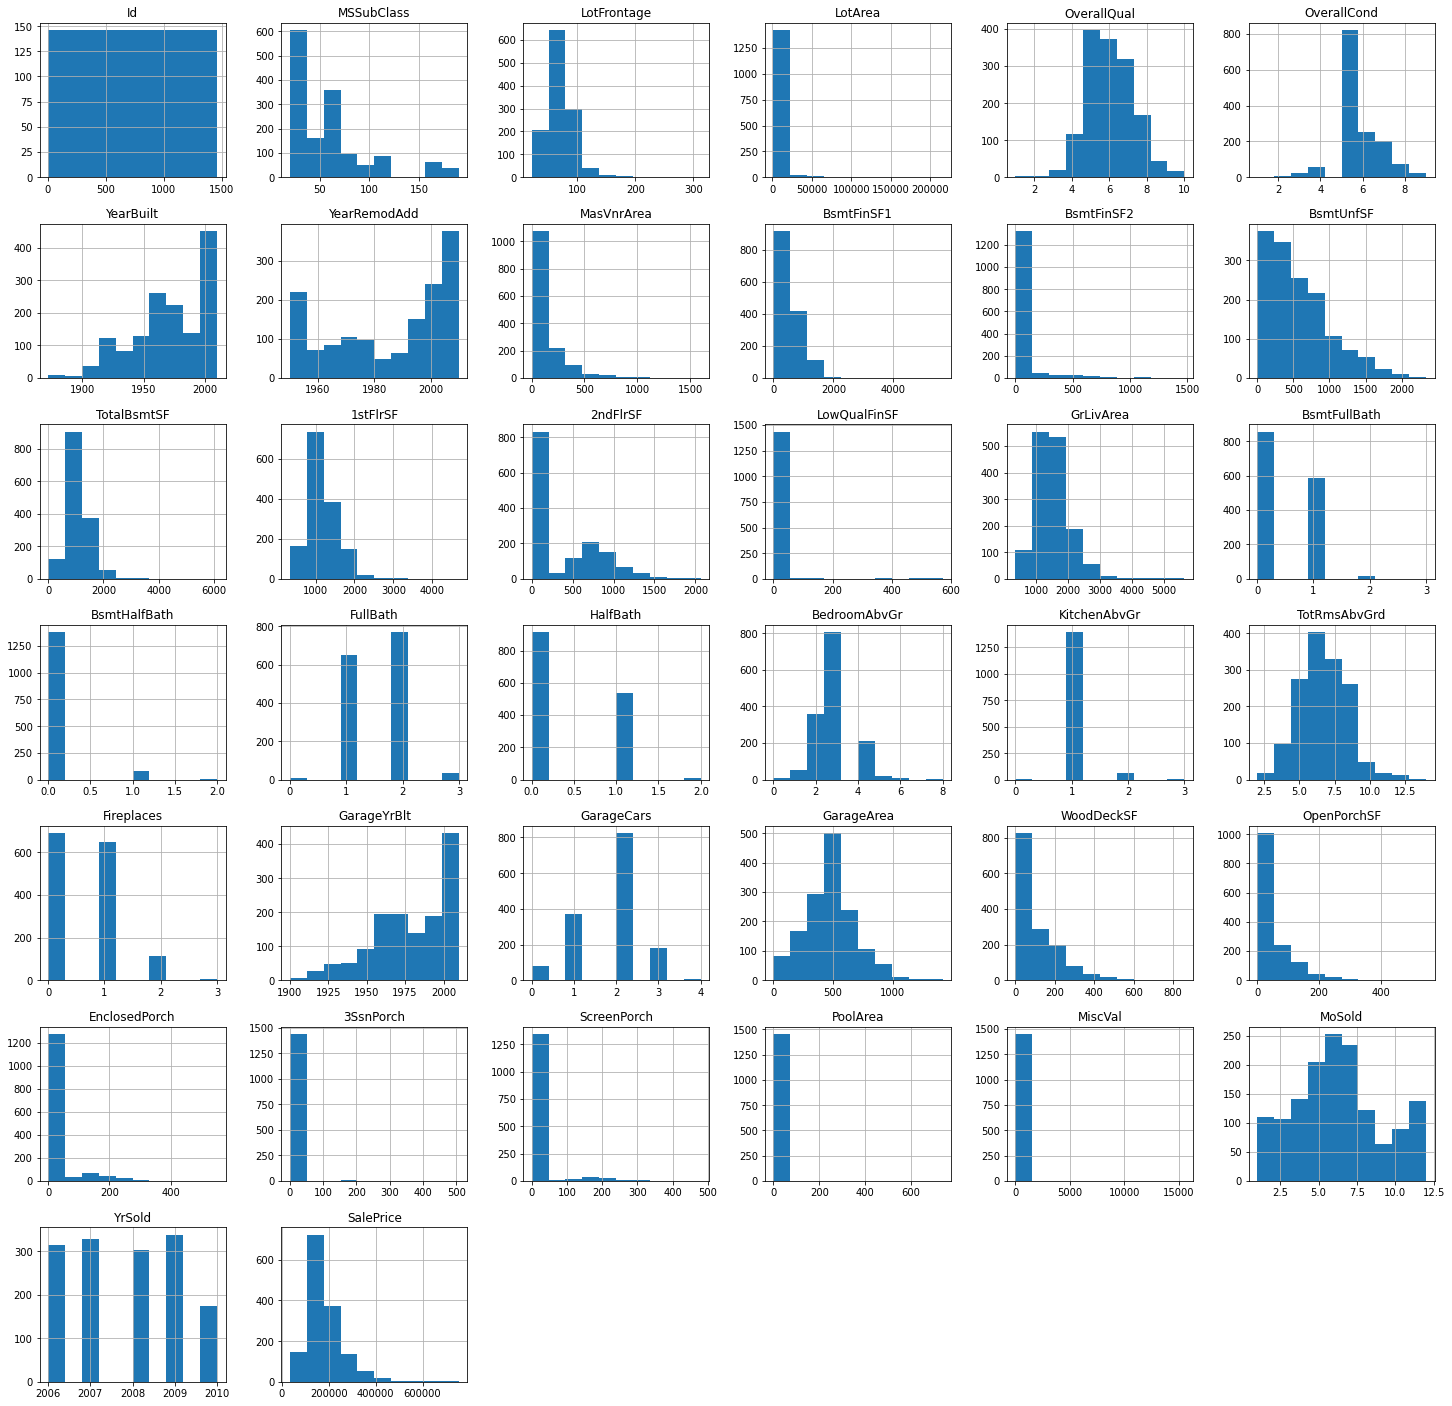

In [19]:
house.hist(figsize=(25, 25));

Counter plot for some categorical attributes.

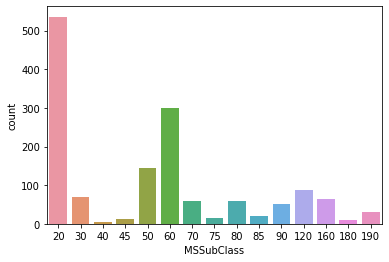

In [20]:
sns.countplot(x ='MSSubClass', data = house)

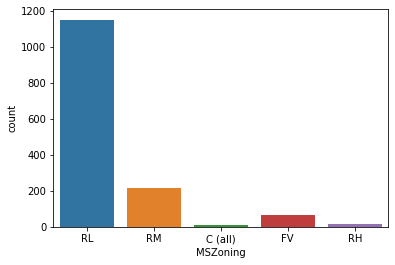

In [21]:
sns.countplot(x ='MSZoning', data = house)

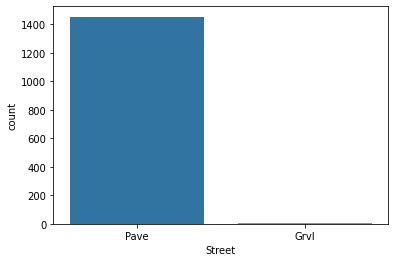

In [22]:
sns.countplot(x ='Street', data = house)

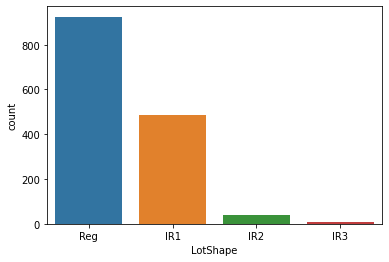

In [23]:
sns.countplot(x ='LotShape', data = house)

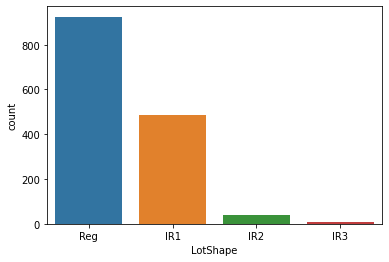

In [24]:
sns.countplot(x ='LotShape', data = house)

**selection columns by data type.**

In [25]:
house.select_dtypes(include=['object'])


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**Selecting categorical data.**

In [26]:
categ_row = []
n = 0 
for row in house_info.index:
  if house[row].nunique() < 30 :
    categ_row.append(row)
    n+=1


print(n)
print(categ_row)

61
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


**Selecting numerical data.**

In [27]:
num_row = []
m = 0 
for row in house_info.index:
  if house[row].nunique() > 30 :
    num_row.append(row)
    m+=1


print(m)
print(num_row)

20
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


categorical columns.

In [28]:
categ_data = house[[i for i in house.columns if i not in ('Id' , 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                                          'ScreenPorch', 'SalePrice')]]

categ_data.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Numerical columns.

In [29]:
num_data = house[[i for i in house.columns if i in ('Id' , 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                                          'ScreenPorch', 'SalePrice')]]

num_data.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


Na values in numerical data.

In [30]:
for n in num_data.columns:
  if num_data[n].isnull().sum() != 0:
    print(n , num_data[n].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [31]:
num_data['LotFrontage'] = num_data['LotFrontage'].fillna(0)
num_data['MasVnrArea'] = num_data['MasVnrArea'].fillna(0)
num_data['GarageYrBlt'] = num_data['GarageYrBlt'].fillna(0)

<ipython-input-31-2ed1f724b2e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['LotFrontage'] = num_data['LotFrontage'].fillna(0)
<ipython-input-31-2ed1f724b2e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['MasVnrArea'] = num_data['MasVnrArea'].fillna(0)
<ipython-input-31-2ed1f724b2e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [32]:
for n in num_data.columns:
  if num_data[n].isnull().sum() != 0:
    print(n , num_data[n].isnull().sum())

**using lable encoder for the categorical data.**

In [33]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
Categ_encoded = pd.DataFrame()  

for i in categ_data.columns :
  Categ_encoded[i]=label.fit_transform(categ_data[i])

In [34]:
Categ_encoded.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,1,2,3,3,0,4,0,5,...,0,0,3,4,4,0,1,2,8,4
1,0,3,1,2,3,3,0,2,0,24,...,0,0,3,4,4,0,4,1,8,4
2,5,3,1,2,0,3,0,4,0,5,...,0,0,3,4,4,0,8,2,8,4
3,6,3,1,2,0,3,0,0,0,6,...,0,0,3,4,4,0,1,0,8,0
4,5,3,1,2,0,3,0,2,0,15,...,0,0,3,4,4,0,11,2,8,4


# Measure of association between two categorical features

 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] are categorical values.

 **For measuring association between two categorical features, we are using  Cramér’s V.**

 It is based on a nominal variation of Pearson’s Chi-Square Test similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association.

**(Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)** 


In [35]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  phi2 = stat / obs
  r, k = crosstab.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(obs-1))
  rcorr = r - ((r-1)**2)/(obs-1)
  kcorr = k - ((k-1)**2)/(obs-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [36]:
rows= []

for var1 in Categ_encoded:
  col = []
  for var2 in Categ_encoded :
    cramers =cramers_V(Categ_encoded[var1], Categ_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = Categ_encoded.columns, index =Categ_encoded.columns)

<ipython-input-37-1d3be3b33130>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


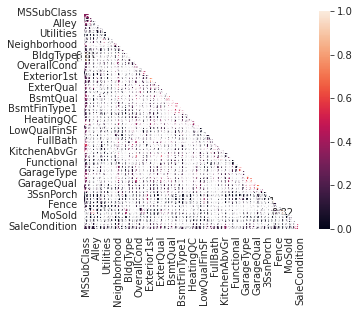

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True,annot=True)

plt.show()

In [38]:
df.style.background_gradient(cmap='coolwarm')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.340000,0.090000,0.310000,0.160000,0.140000,0.000000,0.080000,0.090000,0.370000,0.110000,0.160000,0.890000,0.850000,0.200000,0.190000,0.220000,0.080000,0.190000,0.200000,0.200000,0.290000,0.170000,0.360000,0.330000,0.200000,0.260000,0.230000,0.140000,0.150000,0.240000,0.430000,0.160000,0.250000,0.240000,0.080000,0.310000,0.530000,0.340000,0.490000,0.280000,0.260000,0.100000,0.220000,0.190000,0.330000,0.380000,0.290000,0.240000,0.210000,0.310000,0.000000,0.070000,0.090000,0.130000,0.180000,0.050000,0.020000,0.000000,0.090000,0.150000
MSZoning,0.340000,1.000000,0.250000,0.390000,0.150000,0.100000,0.000000,0.060000,0.070000,0.640000,0.070000,0.060000,0.190000,0.180000,0.190000,0.160000,0.070000,0.000000,0.180000,0.190000,0.100000,0.240000,0.080000,0.220000,0.160000,0.080000,0.060000,0.130000,0.040000,0.050000,0.120000,0.300000,0.100000,0.210000,0.070000,0.020000,0.170000,0.140000,0.170000,0.090000,0.170000,0.170000,0.000000,0.140000,0.120000,0.210000,0.190000,0.140000,0.130000,0.100000,0.220000,0.000000,0.000000,0.000000,0.030000,0.000000,0.200000,0.030000,0.000000,0.150000,0.140000
Street,0.090000,0.250000,0.920000,0.000000,0.030000,0.110000,0.000000,0.000000,0.180000,0.200000,0.160000,0.000000,0.110000,0.020000,0.070000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320000,0.000000,0.040000,0.000000,0.000000,0.090000,0.000000,0.100000,0.000000,0.020000,0.040000,0.000000,0.000000,0.090000,0.000000,0.020000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.060000,0.000000,0.220000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.590000,0.040000,0.030000,0.110000,0.100000
Alley,0.310000,0.390000,0.000000,1.000000,0.080000,0.070000,0.000000,0.030000,0.000000,0.430000,0.130000,0.000000,0.150000,0.140000,0.100000,0.120000,0.110000,0.000000,0.210000,0.200000,0.090000,0.110000,0.040000,0.220000,0.130000,0.080000,0.080000,0.110000,0.000000,0.120000,0.090000,0.200000,0.130000,0.220000,0.060000,0.000000,0.070000,0.040000,0.130000,0.000000,0.090000,0.130000,0.030000,0.070000,0.070000,0.200000,0.140000,0.080000,0.120000,0.140000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.040000,0.060000
LotShape,0.160000,0.150000,0.030000,0.080000,1.000000,0.130000,0.000000,0.220000,0.120000,0.240000,0.100000,0.000000,0.080000,0.070000,0.120000,0.060000,0.040000,0.190000,0.080000,0.090000,0.060000,0.110000,0.000000,0.120000,0.140000,0.060000,0.110000,0.060000,0.070000,0.030000,0.050000,0.110000,0.110000,0.070000,0.090000,0.050000,0.100000,0.080000,0.030000,0.040000,0.090000,0.080000,0.000000,0.140000,0.120000,0.140000,0.140000,0.120000,0.080000,0.050000,0.080000,0.020000,0.170000,0.090000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LandContour,0.140000,0.100000,0.110000,0.070000,0.130000,1.000000,0.000000,0.060000,0.460000,0.360000,0.000000,0.060000,0.070000,0.130000,0.160000,0.100000,0.140000,0.180000,0.120000,0.120000,0.090000,0.130000,0.000000,0.100000,0.090000,0.060000,0.190000,0.090000,0.000000,0.000000,0.050000,0.130000,0.040000,0.100000,0.110000,0.030000,0.110000,0.000000,0.110000,0.000000,0.100000,0.110000,0.000000,0.070000,0.080000,0.120000,0.100000,0.090000,0.040000,0.000000,0.120000,0.130000,0.020000,0.000000,0.030000,0.000000,0.060000,0.070000,0.000000,0.030000,0.110000
Utiliti

In [39]:
# Convert correlation matrix to 1-D Series and sort
upper_corr_mat = df.where(
    np.triu(np.ones(df.shape), k=1).astype(np.bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()

<ipython-input-39-322059cfd6cb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(df.shape), k=1).astype(np.bool))


In [40]:
print(sorted_mat)

Fireplaces     Condition2      0.00
3SsnPorch      HouseStyle      0.00
               OverallQual     0.00
               Exterior1st     0.00
SaleCondition  LowQualFinSF    0.00
                               ... 
Exterior2nd    Exterior1st     0.76
MiscVal        MiscFeature     0.82
HouseStyle     MSSubClass      0.85
BldgType       MSSubClass      0.89
PoolQC         PoolArea        1.00
Length: 1830, dtype: float64


# Measure of association between two Numerical features
First drop Id and SalePrice.

In [41]:
num_data_corr_1 = num_data.drop(['Id' ] , axis= 1)
num_data_corr_2 = num_data_corr_1.drop(['SalePrice' ] , axis= 1)
num_data_corr_2.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0


In [42]:
num_data_corr_2.shape

(1460, 18)

In [43]:
num_corr = num_data_corr_2.corr()
num_corr

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
LotFrontage,1.000000,0.100739,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.220347,0.019317,0.201473,-0.016780,0.069605,0.027366,0.022969
LotArea,0.100739,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.072599,0.180403,0.171698,0.084774,-0.018340,0.043160
YearBuilt,0.036853,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.272029,0.478954,0.224880,0.188686,-0.387268,-0.050364
YearRemodAdd,0.078686,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.146357,0.371600,0.205726,0.226298,-0.193919,-0.038740
MasVnrArea,0.105010,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.132696,0.370884,0.159991,0.122528,-0.109907,0.062248
BsmtFinSF1,0.076670,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.115843,0.296970,0.204306,0.111761,-0.102303,0.062021
BsmtFinSF2,-0.009312,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.035070,-0.018227,0.067898,0.003093,0.036543,0.088871
BsmtUnfSF,0.160829,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.042720,0.183303,-0.005316,0.129005,-0.002538,-0.012579
TotalBsmtSF,0.238274,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.176359,0.486665,0.232019,0.247264,-0.095478,0.084489
1stFlrSF,0.245181,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.166642,0.489782,0.235459,0.211671,-0.065292,0.088758


In [44]:
num_corr.style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
LotFrontage,1.000000,0.100739,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.220347,0.019317,0.201473,-0.016780,0.069605,0.027366,0.022969
LotArea,0.100739,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.072599,0.180403,0.171698,0.084774,-0.018340,0.043160
YearBuilt,0.036853,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.272029,0.478954,0.224880,0.188686,-0.387268,-0.050364
YearRemodAdd,0.078686,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.146357,0.371600,0.205726,0.226298,-0.193919,-0.038740
MasVnrArea,0.105010,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.132696,0.370884,0.159991,0.122528,-0.109907,0.062248
BsmtFinSF1,0.076670,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.115843,0.296970,0.204306,0.111761,-0.102303,0.062021
BsmtFinSF2,-0.009312,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.035070,-0.018227,0.067898,0.003093,0.036543,0.088871
BsmtUnfSF,0.160829,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.042720,0.183303,-0.005316,0.129005,-0.002538,-0.012579
TotalBsmtSF,0.238274,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.176359,0.486665,0.232019,0.247264,-0.095478,0.084489
1stFlrSF,0.245181,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.166642,0.489782,0.235459,0.211671,-0.065292,0.088758


In [45]:
# Convert correlation matrix to 1-D Series and sort
upper_corr_mat_num = num_corr.where(
    np.triu(np.ones(num_corr.shape), k=1).astype(np.bool))

unique_corr_pairs_num = upper_corr_mat_num.unstack().dropna()
sorted_mat_num = unique_corr_pairs_num.sort_values()

<ipython-input-45-e55f22b58157>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(num_corr.shape), k=1).astype(np.bool))


In [46]:
sorted_mat_num

BsmtUnfSF      BsmtFinSF1     -0.495251
EnclosedPorch  YearBuilt      -0.387268
BsmtUnfSF      BsmtFinSF2     -0.209294
2ndFlrSF       1stFlrSF       -0.202646
EnclosedPorch  YearRemodAdd   -0.193919
                                 ...   
GarageArea     GarageYrBlt     0.560783
GrLivArea      1stFlrSF        0.566024
YearRemodAdd   YearBuilt       0.592855
GrLivArea      2ndFlrSF        0.687501
1stFlrSF       TotalBsmtSF     0.819530
Length: 153, dtype: float64

**concatenate two dataframes.**

In [47]:
num_no_id = num_data.drop(['Id' ] , axis= 1)
cancat_data = pd.concat([num_no_id , Categ_encoded] , axis=1)
cancat_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,3,4,4,0,1,2,8,4
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,3,4,4,0,4,1,8,4
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,3,4,4,0,8,2,8,4
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,3,4,4,0,1,0,8,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,3,4,4,0,11,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,0,3,4,4,0,7,1,8,4
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,0,0,3,2,4,0,1,4,8,4
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,0,3,0,2,17,4,4,8,4
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,0,0,3,4,4,0,3,4,8,4


In [48]:
for n in cancat_data.columns:
  if cancat_data[n].isnull().sum() != 0:
    print(n , cancat_data[n].isnull().sum())





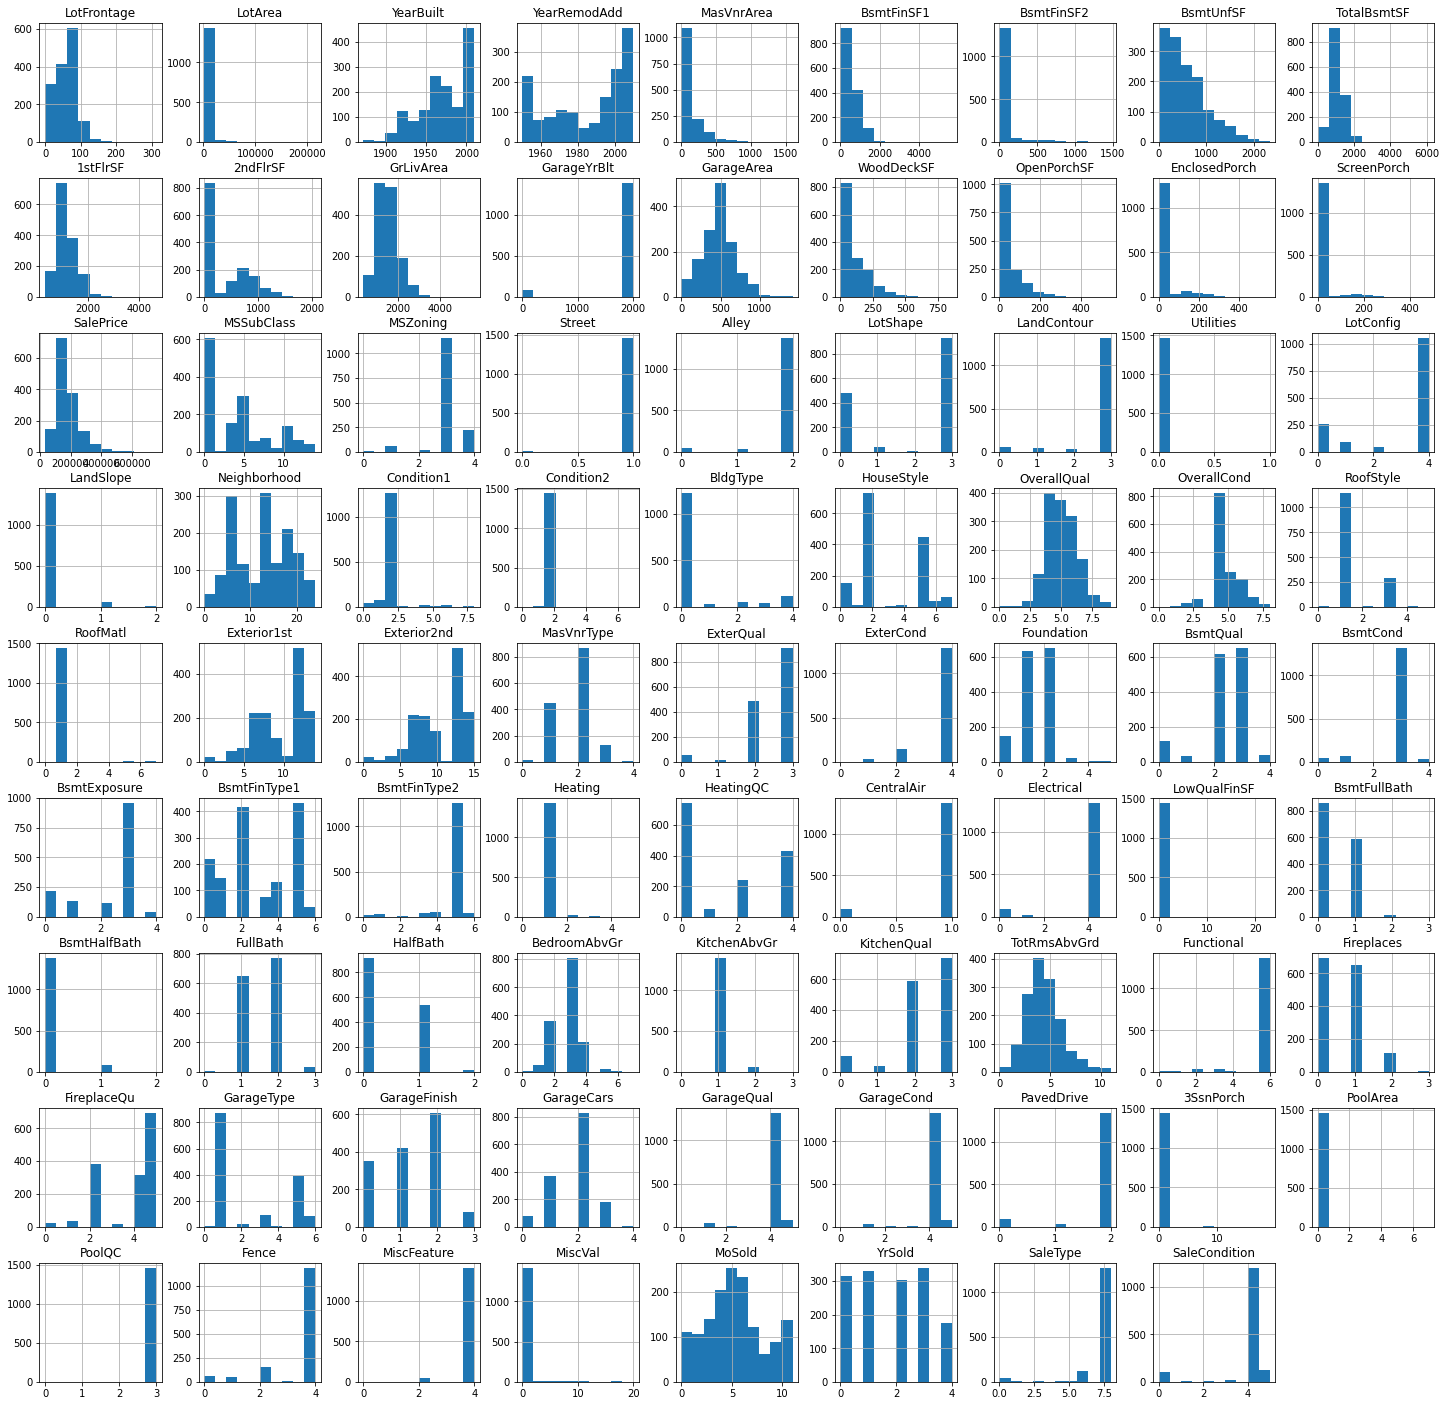

In [49]:
cancat_data.hist(figsize=(25, 25));

**Normalize the numeric attributes except SalePrice.**



In [50]:
def normalize (df , c ):
  """fd is a dataframe and c is a column name"""
  column = str(c)
  df_min_max_scaled = df
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
  df = df_min_max_scaled

In [51]:
normal_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                                                          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                                          'ScreenPorch', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
              'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
              'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 
              'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
              'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition' ]

for c in normal_col:
  normalize(cancat_data , c)

In [52]:
cancat_data.shape

(1460, 80)

In [53]:
cancat_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.207668,0.033420,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,...,0.0,0.0,1.0,1.0,1.0,0.00,0.090909,0.50,1.0,0.8
1,0.255591,0.038795,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,...,0.0,0.0,1.0,1.0,1.0,0.00,0.363636,0.25,1.0,0.8
2,0.217252,0.046507,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,...,0.0,0.0,1.0,1.0,1.0,0.00,0.727273,0.50,1.0,0.8
3,0.191693,0.038561,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,...,0.0,0.0,1.0,1.0,1.0,0.00,0.090909,0.00,1.0,0.0
4,0.268371,0.060576,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,...,0.0,0.0,1.0,1.0,1.0,0.00,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.198083,0.030929,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,0.142038,...,0.0,0.0,1.0,1.0,1.0,0.00,0.636364,0.25,1.0,0.8
1456,0.271565,0.055505,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,0.252373,0.399036,...,0.0,0.0,1.0,0.5,1.0,0.00,0.090909,1.00,1.0,0.8
1457,0.210863,0.036187,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,0.188543,0.195961,...,0.0,0.0,1.0,0.0,0.5,0.85,0.363636,1.00,1.0,0.8
1458,0.217252,0.039342,0.565217,0.766667,0.000000,0.008682,0.698100,0.000000,0.176432,0.170721,...,0.0,0.0,1.0,1.0,1.0,0.00,0.272727,1.00,1.0,0.8


**Split the dataset to training and test dataframe.**

Split the dataset to training and test dataframe.

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = cancat_data.drop(['SalePrice'], axis=1)
Y = cancat_data['SalePrice']
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [55]:
X_train.shape

(1168, 79)

In [56]:
Y_train.shape

(1168,)

In [57]:
X_valid.shape

(292, 79)

**mean absolute percentage error**


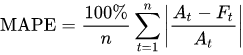

**M**	=	mean absolute percentage error

**n**	=	number of times the summation iteration happens

**A_t**	=	actual value

**F_t**	=	forecast value


https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

# Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error
 
model_RFR = RandomForestRegressor(n_estimators=75 , max_depth=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
MAPE = mean_absolute_percentage_error(Y_valid, Y_pred)
MAPE

0.09686181502307828

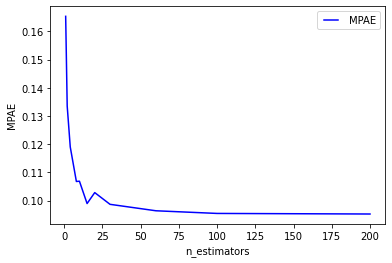

In [59]:
n_estimators = [1, 2, 4, 8, 10, 15, 20, 30, 60, 100, 200]
train_results = []

for estimator in n_estimators:
   model_RFR = RandomForestRegressor(n_estimators=estimator)
   model_RFR.fit(X_train, Y_train)

   Y_pred = model_RFR.predict(X_valid)

   MAPE = mean_absolute_percentage_error(Y_valid, Y_pred)
   train_results.append(MAPE)


   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='MPAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MPAE')
plt.xlabel('n_estimators')
plt.show()

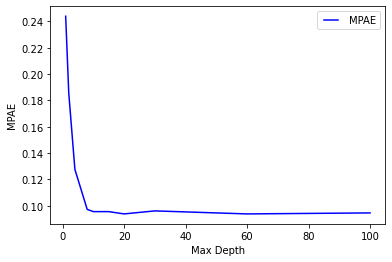

In [60]:
n_depth = [1, 2, 4, 8, 10, 15, 20, 30, 60, 100]
train_results = []

for estimator in n_depth:
   model_RFR = RandomForestRegressor(max_depth=estimator)
   model_RFR.fit(X_train, Y_train)

   Y_pred = model_RFR.predict(X_valid)

   MAPE = mean_absolute_percentage_error(Y_valid, Y_pred)
   train_results.append(MAPE)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_depth, train_results, 'b', label='MPAE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MPAE')
plt.xlabel('Max Depth')
plt.show()
   


**R-Square for the decision tree**

In [61]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_valid, Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.8555739000083099


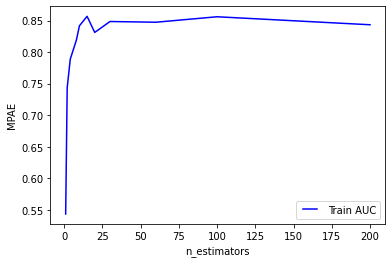

In [62]:
n_estimators = [1, 2, 4, 8, 10, 15, 20, 30, 60, 100, 200]
train_results = []

for estimator in n_estimators:
   model_RFR = RandomForestRegressor(n_estimators=estimator)
   model_RFR.fit(X_train, Y_train)

   Y_pred = model_RFR.predict(X_valid)

   r2 = r2_score(Y_valid, Y_pred)
   train_results.append(r2)


   
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('MPAE')
plt.xlabel('n_estimators')
plt.show()

**K-Fold cross validation**

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

RF = RandomForestRegressor(n_estimators=75 , max_depth=5)
scores = cross_val_score(RF, X_train, Y_train, scoring='r2', cv=5)
scores  

array([0.86754159, 0.74062534, 0.86937081, 0.81363868, 0.84354827])

mean of 10 fold cross validation

In [112]:
print(scores.mean())

0.8269449359255365


Standard deviation for 5 fold cross validation.[link text](https://)

In [113]:
print(scores.std())

0.04764838622112382


In [66]:
num = [5, 10 , 15 , 20]
all_scores = []

for ncv in num:
  RF = RandomForestRegressor(n_estimators=75 , max_depth=10)
  scores = cross_val_score(RF, X_train, Y_train, scoring='r2', cv=ncv)
  all_scores.append(scores)

all_scores

[array([0.88748072, 0.77999934, 0.89579131, 0.84124613, 0.88673085]),
 array([0.89218041, 0.89329128, 0.68503333, 0.85069327, 0.89252475,
        0.88299208, 0.84187398, 0.86848938, 0.87630208, 0.89472209]),
 array([0.90036912, 0.88635302, 0.89925556, 0.84218484, 0.42094141,
        0.86419555, 0.89536619, 0.87435182, 0.89332179, 0.84065791,
        0.85131036, 0.8743872 , 0.89590726, 0.89187758, 0.87931166]),
 array([0.90805111, 0.87883434, 0.85670615, 0.87768321, 0.87621541,
        0.44332029, 0.77642732, 0.89158065, 0.91629971, 0.85922001,
        0.87695898, 0.88932472, 0.85777311, 0.82805526, 0.9113694 ,
        0.83490568, 0.90430515, 0.83165265, 0.89796887, 0.88577895])]

In [67]:
all_scores[1]

array([0.89218041, 0.89329128, 0.68503333, 0.85069327, 0.89252475,
       0.88299208, 0.84187398, 0.86848938, 0.87630208, 0.89472209])

In [68]:
all_mean = []
for n in range(len(all_scores)):
  s = 0
  c = 0
  x = all_scores[n]
  for m in x:
    c +=1
    s +=m
  ave = s/c
  all_mean.append(ave)


print( all_mean)

[0.858249670242859, 0.8578102647792043, 0.8473194172919254, 0.8501215491316643]


In [69]:
all_std = []
for n in all_scores:
  all_std.append(n.std())

print( all_std)

[0.043559707810576366, 0.06021161828305471, 0.11560356671083562, 0.09909254535156228]


In [70]:
# search for an optimal value of K for lr


# range of l we want to try
num = range(2, 20)
# empty list to store scores
all_scores = []

# 1. we will loop through reasonable values of k
for ncv in num:
    # 2. run KNeighborsClassifier with k neighbours
    RF = RandomForestRegressor(n_estimators=75 , max_depth=10)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(RF, X_train, Y_train, scoring='r2', cv=ncv)
    # 4. append mean of scores for k neighbors to k_scores list
    all_scores.append(scores)


print(all_scores)

[array([0.84049636, 0.82497572]), array([0.82846664, 0.87689554, 0.86763628]), array([0.86733286, 0.81893709, 0.85099138, 0.86886735]), array([0.89806998, 0.76969461, 0.89893354, 0.84388728, 0.88306117]), array([0.88457087, 0.76874021, 0.87331532, 0.84358359, 0.86419134,
       0.88929688]), array([0.89119648, 0.88581417, 0.72392088, 0.89246114, 0.8513869 ,
       0.870087  , 0.88317844]), array([0.88795557, 0.858369  , 0.74201959, 0.90763765, 0.86374226,
       0.85749497, 0.86737148, 0.89735137]), array([0.89699364, 0.87174515, 0.71321924, 0.8761502 , 0.87874798,
       0.85906718, 0.87229842, 0.83586836, 0.89914231]), array([0.8961929 , 0.88946641, 0.65105129, 0.87199741, 0.89249862,
       0.88901856, 0.85438398, 0.86827809, 0.87656539, 0.89748519]), array([0.8866334 , 0.89133094, 0.88605545, 0.58422952, 0.93129416,
       0.87749164, 0.88592969, 0.82858656, 0.83771241, 0.89946087,
       0.89403234]), array([0.88762096, 0.87961255, 0.87696927, 0.53424545, 0.85550988,
       0.9017

In [104]:
num = range(2, 20)
scores_mean =[]
for score in all_scores:
  scores_mean.append(score.mean())
print(scores_mean)

[0.8327360426405429, 0.8576661534215283, 0.8515321720775022, 0.8587293155970139, 0.8539497006712882, 0.8568635731889825, 0.8602427352618827, 0.8559147194241552, 0.858693785273625, 0.8547960898412267, 0.8484971108997165, 0.8611832918109694, 0.8551783247004104, 0.8492013875955973, 0.8627159542037568, 0.859150362272886, 0.8482836212182165, 0.8520673163461551]


Text(0, 0.5, 'Cross-validated R-Square')

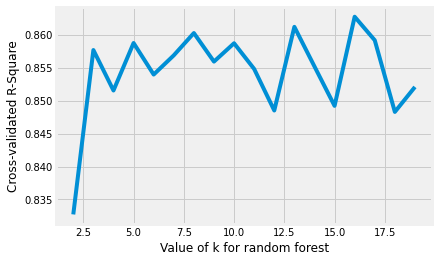

In [105]:
# plot how accuracy changes as we vary l
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(num, scores_mean)
plt.xlabel('Value of k for random forest')
plt.ylabel('Cross-validated R-Square')

# Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.153881631053582


In [123]:
from sklearn.metrics import r2_score
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
r2 = r2_score(Y_valid, Y_pred)
print('r-score for the model is', r2)

r-score for the model is 0.6015325757535759


In [76]:
x_intercept = model_LR.intercept_
x_intercept

-39336.32292081541

In [77]:
from scipy import stats
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
params = np.append(model_LR.intercept_,model_LR.coef_)
predictions = model_LR.predict(X_train)
new_X = np.append(np.ones((len(X_train),1)), X_train, axis=1)
M_S_E = (sum((Y_train-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val


<ipython-input-77-81d626131f45>:9: RuntimeWarning: invalid value encountered in sqrt
  s_b = np.sqrt(v_b)


array([0.385, 0.124, 0.   , 0.006, 0.492, 0.   ,   nan,   nan,   nan,
         nan, 0.256, 0.268, 0.496, 0.106, 0.011, 0.053, 0.901, 0.497,
       0.176, 0.159, 0.406, 0.002, 0.114, 0.189, 0.11 , 0.221, 0.582,
       0.955, 0.578, 0.048, 0.   , 0.373, 0.134, 0.   , 0.   , 0.124,
       0.033, 0.011, 0.059, 0.001, 0.   , 0.975, 0.094, 0.   , 0.023,
       0.024, 0.521, 0.218, 0.276, 0.503, 0.955, 0.305, 0.411, 0.543,
       0.663, 0.334, 0.268, 0.002, 0.   , 0.   , 0.004, 0.   , 0.148,
       0.364, 0.045, 0.96 , 0.18 , 0.413, 0.201, 0.75 , 0.435, 0.01 ,
       0.035, 0.238, 0.781, 0.382, 0.146, 0.102, 0.357, 0.   ])

drop the intercept p-value

In [78]:
p_val = np.delete(p_val, 0)
p_val

array([0.124, 0.   , 0.006, 0.492, 0.   ,   nan,   nan,   nan,   nan,
       0.256, 0.268, 0.496, 0.106, 0.011, 0.053, 0.901, 0.497, 0.176,
       0.159, 0.406, 0.002, 0.114, 0.189, 0.11 , 0.221, 0.582, 0.955,
       0.578, 0.048, 0.   , 0.373, 0.134, 0.   , 0.   , 0.124, 0.033,
       0.011, 0.059, 0.001, 0.   , 0.975, 0.094, 0.   , 0.023, 0.024,
       0.521, 0.218, 0.276, 0.503, 0.955, 0.305, 0.411, 0.543, 0.663,
       0.334, 0.268, 0.002, 0.   , 0.   , 0.004, 0.   , 0.148, 0.364,
       0.045, 0.96 , 0.18 , 0.413, 0.201, 0.75 , 0.435, 0.01 , 0.035,
       0.238, 0.781, 0.382, 0.146, 0.102, 0.357, 0.   ])

In [79]:
x_coef = model_LR.coef_
x_coef

array([ 1.33763269e+04,  1.10287707e+05,  2.84362889e+04,  2.71579011e+03,
        5.22403293e+04,  9.58698400e+04,  2.68985787e+04, -1.13371148e+04,
        9.07126648e+04,  5.81097266e+05,  2.68281663e+05, -4.23837613e+05,
       -1.04551623e+04,  3.35548112e+04,  1.19577988e+04, -9.07912567e+02,
        5.66969103e+03,  1.05904080e+04, -9.21463088e+03, -4.88664083e+03,
        4.09544464e+04,  7.69069440e+03, -2.59449279e+03,  6.52964445e+03,
       -3.57311244e+04,  1.17738150e+03, -4.03680388e+02,  2.04448740e+03,
       -1.61840780e+04, -3.11741433e+05, -5.13230358e+03, -6.99537330e+03,
        9.04393561e+04,  4.29789206e+04,  8.24650459e+03,  2.13829400e+04,
       -1.80943343e+04,  1.29443911e+04,  2.05708820e+04, -2.62250075e+04,
       -1.52225057e+02,  1.36624263e+04, -2.78548467e+04,  1.18544187e+04,
       -7.77636201e+03,  2.41375899e+03,  9.48955357e+03, -1.77525516e+04,
       -1.60495034e+03,  2.40427029e+02, -4.41452476e+03,  6.17864539e+04,
        4.47267335e+03,  

In [80]:
x_name = []
n = 0 
for row in X_train:
    x_name.append(row)
    n+=1

print(n)
print(x_name)

79
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', '

In [81]:
d = {'Name': x_name, 'Coefficient': x_coef , "P-value" : p_val}
df = pd.DataFrame(data = d)
sort_df = df.sort_values(by=['Coefficient'], key=abs)
sort_df

,Name,Coefficient,P-value
40,ExterCond,-152.225057,0.975
64,GarageFinish,-212.636566,0.960
49,CentralAir,240.427029,0.955
26,LandSlope,-403.680388,0.955
15,OpenPorchSF,-907.912567,0.901
...,...,...,...
1,LotArea,110287.707311,0.000
10,2ndFlrSF,268281.663110,0.268
29,Condition2,-311741.433386,0.000
11,GrLivArea,-423837.612530,0.496


**plot for residual error**

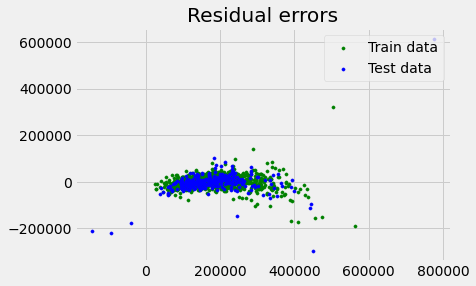

In [82]:
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model_LR.predict(X_train), model_LR.predict(X_train) -  Y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model_LR.predict(X_valid), model_LR.predict(X_valid) - Y_valid,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

**Cross-Validation in sklearn**

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores  

array([0.89275061, 0.74498725, 0.87668815, 0.84760244, 0.87045027])

**mean of 10-fold cross validation.**

In [120]:
print(scores.mean())

0.8464957433824223


the standard deviation of the data to see degree of variance in the results obtained by our model.

In [121]:
print(scores.std())

0.05278278658136918


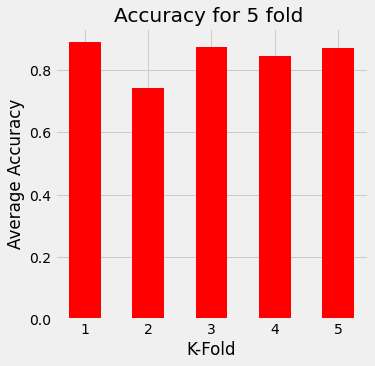

In [86]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'1':0.892, '2':0.744, '3':0.876,
        '4':0.847 , '5':0.870}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.5)
 
plt.xlabel("K-Fold")
plt.ylabel("Average Accuracy")
plt.title("Accuracy for 5 fold ")
plt.show()

In [87]:
num = [2, 5, 10 , 15]
all_scores_lm = []

for ncv_lm in num:
  lm = LinearRegression()
  scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv= ncv_lm)
  all_scores_lm.append(scores)

all_scores

[array([0.84049636, 0.82497572]),
 array([0.82846664, 0.87689554, 0.86763628]),
 array([0.86733286, 0.81893709, 0.85099138, 0.86886735]),
 array([0.89806998, 0.76969461, 0.89893354, 0.84388728, 0.88306117]),
 array([0.88457087, 0.76874021, 0.87331532, 0.84358359, 0.86419134,
        0.88929688]),
 array([0.89119648, 0.88581417, 0.72392088, 0.89246114, 0.8513869 ,
        0.870087  , 0.88317844]),
 array([0.88795557, 0.858369  , 0.74201959, 0.90763765, 0.86374226,
        0.85749497, 0.86737148, 0.89735137]),
 array([0.89699364, 0.87174515, 0.71321924, 0.8761502 , 0.87874798,
        0.85906718, 0.87229842, 0.83586836, 0.89914231]),
 array([0.8961929 , 0.88946641, 0.65105129, 0.87199741, 0.89249862,
        0.88901856, 0.85438398, 0.86827809, 0.87656539, 0.89748519]),
 array([0.8866334 , 0.89133094, 0.88605545, 0.58422952, 0.93129416,
        0.87749164, 0.88592969, 0.82858656, 0.83771241, 0.89946087,
        0.89403234]),
 array([0.88762096, 0.87961255, 0.87696927, 0.53424545, 0.855509

In [88]:
all_mean_lm = []
for n in range(len(all_scores_lm)):
  s = 0
  c = 0
  x = all_scores_lm[n]
  for m in x:
    c +=1
    s +=m
  ave = s/c
  all_mean_lm.append(ave)


print( all_mean_lm)

[0.8429766560626495, 0.8464957433824223, 0.8476833693664773, 0.8362807524906329]


In [89]:
all_std_lm = []
for n in all_scores_lm:
  all_std_lm.append(n.std())

print( all_std_lm)

[0.009087680214811322, 0.05278278658136918, 0.07755774541774912, 0.14532192625556867]


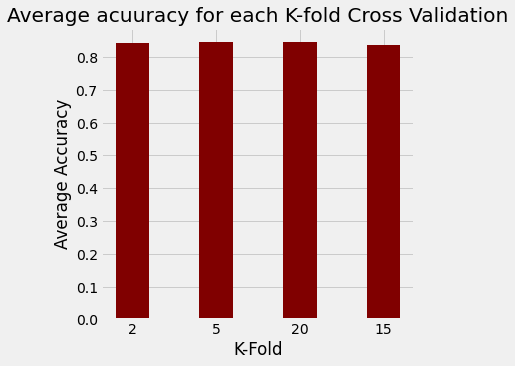

In [90]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'2':0.842, '5':0.846, '20':0.847,
        '15':0.836}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("K-Fold")
plt.ylabel("Average Accuracy")
plt.title("Average acuuracy for each K-fold Cross Validation")
plt.show()

plot r-square for five fold cross validation(linear regression and random forest)

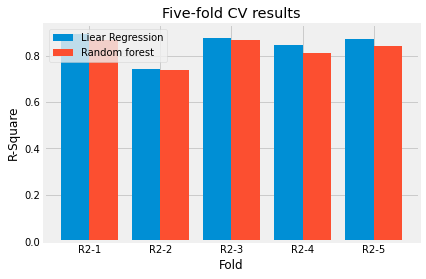

In [124]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['R2-1','R2-2','R2-3','R2-4', 'R2-5']
randon_for = [0.867,	0.740,	0.869,	0.813,	0.843	]
linear_reg = [0.892,	0.744,	0.876,	0.847,	0.870]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, linear_reg, 0.4, label = 'Liear Regression')
plt.bar(X_axis + 0.2, randon_for, 0.4, label = 'Random forest')
  
plt.xticks(X_axis, X)
plt.xlabel("Fold")
plt.ylabel("R-Square")
plt.title("Five-fold CV results")
plt.legend()
plt.show()

In [106]:
# search for an optimal value of K for lr

# range of l we want to try
l_range = range(2, 20)
# empty list to store scores
l_scores = []

# 1. we will loop through reasonable values of k
for l in l_range:
    # 2. run KNeighborsClassifier with k neighbours
    lm = LinearRegression()
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv= l)
    # 4. append mean of scores for k neighbors to k_scores list
    l_scores.append(scores.mean())


print(l_scores)

[0.8429766560626495, -3.9172724000427757e+17, 0.8507394280528002, 0.8464957433824223, 0.8493260736575682, -2.2802786519404537e+20, 0.8527915136628119, 0.8519142033676718, 0.8476833693664773, 0.8449907905389769, 0.8404297416194687, 0.8505774499037954, 0.8461128965959703, 0.8362807524906329, 0.8547622684594134, 0.8506457295529684, 0.8330689309543736, 0.8414187840686147]


Text(0, 0.5, 'Cross-validated R-Square')

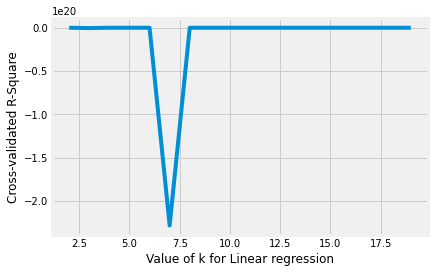

In [107]:
# plot how accuracy changes as we vary l
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(l_range, l_scores)
plt.xlabel('Value of k for Linear regression')
plt.ylabel('Cross-validated R-Square')

# SVM – Support vector Machine
https://scikit-learn.org/stable/modules/svm.html

In [93]:
from sklearn import svm
from sklearn.svm import SVC
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.30085882374095924


In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_valid, Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -0.04794628974556092
